In [1]:
import tensorflow as tf
import numpy as np

import matplotlib.pyplot as plt

print("TensorFlow version:", tf.__version__)
tf.keras.backend.set_floatx('float64')

TensorFlow version: 2.1.0


In [2]:
mnist = tf.keras.datasets.mnist

(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train, x_test = x_train / 255.0, x_test / 255.0

In [3]:
model = tf.keras.models.Sequential([
  tf.keras.layers.Flatten(input_shape=(28, 28)),
  tf.keras.layers.Dense(128, activation='relu'),
  tf.keras.layers.Dropout(0.2),
  tf.keras.layers.Dense(10)
])

In [4]:
predictions = model(x_train[:1]).numpy()
predictions

array([[-0.13167473, -0.03948278,  0.59872903,  0.66577781,  0.86489228,
         0.2754803 , -0.53514505, -0.29136204, -0.13526106, -0.76312545]])

In [5]:
tf.nn.softmax(predictions).numpy()

array([[0.07324653, 0.08032034, 0.15205384, 0.16259841, 0.19842236,
        0.11005563, 0.04892853, 0.0624361 , 0.07298432, 0.03895395]])

In [6]:
loss_fn = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True)

In [7]:
loss_fn(y_train[:1], predictions).numpy()

2.2067694664001465

In [8]:
model.compile(optimizer='adam',
              loss=loss_fn,
              metrics=['accuracy'])

In [9]:
fit_result = model.fit(x_train, y_train, epochs=5)

Train on 60000 samples
Epoch 1/5
60000/60000 [==============================] - 5s 84us/sample - loss: 0.2959 - accuracy: 0.9139
Epoch 2/5
60000/60000 [==============================] - 5s 80us/sample - loss: 0.1426 - accuracy: 0.9578
Epoch 3/5
60000/60000 [==============================] - 5s 91us/sample - loss: 0.1082 - accuracy: 0.9678
Epoch 4/5
60000/60000 [==============================] - 4s 75us/sample - loss: 0.0881 - accuracy: 0.9728
Epoch 5/5
60000/60000 [==============================] - 5s 82us/sample - loss: 0.0738 - accuracy: 0.9767


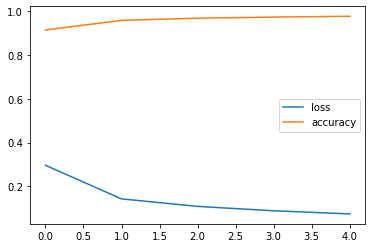

In [10]:
plt.plot(fit_result.history['loss'], label='loss')
plt.plot(fit_result.history['accuracy'], label='accuracy')
plt.legend()

In [11]:
model.evaluate(x_test,  y_test, verbose=2)

10000/10000 - 0s - loss: 0.0698 - accuracy: 0.9779


[0.06978681924938722, 0.9779]

In [12]:
probability_model = tf.keras.Sequential([
  model,
  tf.keras.layers.Softmax()
])

In [13]:
arr = probability_model(x_test[:20])

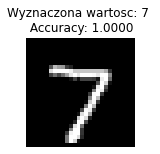

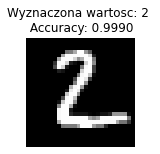

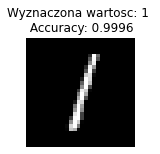

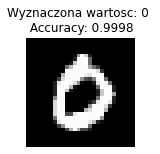

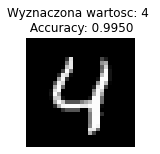

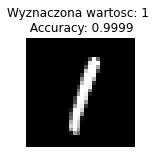

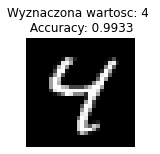

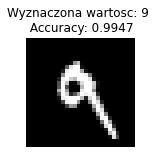

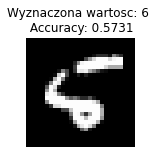

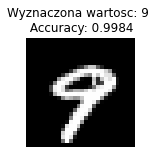

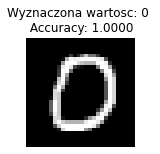

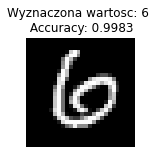

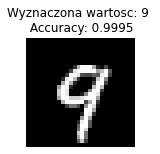

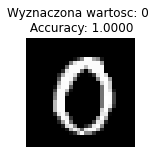

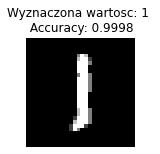

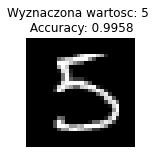

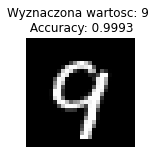

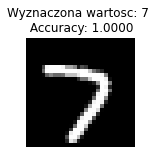

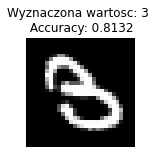

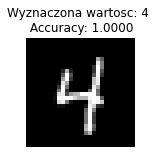

In [14]:
for x in range(len(arr)):
    value_old = 0
    for i in range(len(arr[x])): 
        
        tens = arr[x][i]
        
        
        
        if tens > value_old:
            var = i
            value = tens
            value_old = tens
            
 
    sample_image = np.array(x_test[x]) 
    sample_image = sample_image.reshape(28,28)
    plt.figure(figsize=(2,2))
    plt.axis('off')
    plt.title('Wyznaczona wartosc: {} \n Accuracy: {:.4f}'.format(var,value))
    plt.imshow(sample_image, cmap = 'gray')